In [9]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Lars
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile


from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier

from sklearn import tree

from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from brew.base import Ensemble
from brew.base import EnsembleClassifier
from brew.combination.combiner import Combiner


# from sklearn.model_selection import KFold

from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error


from sklearn import svm, datasets


%matplotlib inline

In [2]:
def load_data(filename, skiprows = 1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=' ')

In [3]:
training_data = np.array(load_data("training_data.txt", skiprows = 1))

y_train = training_data[:, 0]
X_train = training_data[:, 1:]

X_tr, X_tst, y_tr, y_tst = train_test_split(X_train, y_train, random_state=0, test_size=.25)

In [10]:
L = Lars(fit_intercept=True, verbose=False)

L.fit(X_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [11]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X_train, y_train, random_state=0, test_size=.25)
training_errors = []

test_errors = []

for i in range(10,110,10):
    
    

    
    
    

    select = SelectPercentile(percentile=i)
    select.fit(X_tr, y_tr)
    X_train_selected = select.transform(X_tr)
    L.fit(X_train_selected, y_tr)
    
    
    y_pred = np.sign(L.predict(X_train_selected))
    binarytrain_error = (y_pred!=y_tr).sum()
    training_errors.append(binarytrain_error/15000)
    
    X_test_selected = select.transform(X_tst)

    y_test_prediction = np.sign(L.predict(X_test_selected))
    binarytest_error = (y_test_prediction!=y_tst).sum()


    
    test_errors.append(binarytest_error/5000)

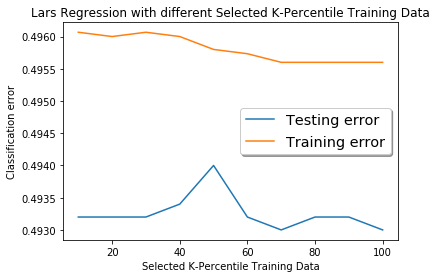

Test error minimized at selected K-percentile training data value of = 70


In [12]:
percentile_range = [i for i in range(10,110,10)]
plt.figure()
plt.plot(percentile_range, test_errors, label='Testing error')
plt.plot(percentile_range, training_errors, label='Training error')
plt.xlabel('Selected K-Percentile Training Data')
plt.ylabel('Classification error')
plt.title('Lars Regression with different Selected K-Percentile Training Data')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

val, idx = min((val, idx) for (idx, val) in enumerate(test_errors))
print('Test error minimized at selected K-percentile training data value of = %d'%(percentile_range[idx]))

In [13]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X_train, y_train, random_state=0, test_size=.25)
L = Lasso(alpha=1.0)
training_errors = []

test_errors = []

for i in range(10,110,10):


    select = SelectPercentile(percentile=i)
    select.fit(X_tr, y_tr)
    X_train_selected = select.transform(X_tr)
    L.fit(X_train_selected, y_tr)
    
    
    y_pred = np.sign(L.predict(X_train_selected))
    binarytrain_error = (y_pred!=y_tr).sum()
    training_errors.append(binarytrain_error/15000)
    
    X_test_selected = select.transform(X_tst)

    y_test_prediction = np.sign(L.predict(X_test_selected))
    binarytest_error = (y_test_prediction!=y_tst).sum()


    
    test_errors.append(binarytest_error/5000)

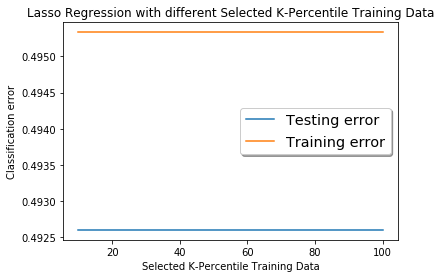

Test error minimized at selected K-percentile training data value of = 10


In [14]:
percentile_range = [i for i in range(10,110,10)]
plt.figure()
plt.plot(percentile_range, test_errors, label='Testing error')
plt.plot(percentile_range, training_errors, label='Training error')
plt.xlabel('Selected K-Percentile Training Data')
plt.ylabel('Classification error')
plt.title('Lasso Regression with different Selected K-Percentile Training Data')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

val, idx = min((val, idx) for (idx, val) in enumerate(test_errors))
print('Test error minimized at selected K-percentile training data value of = %d'%(percentile_range[idx]))